<a href="https://colab.research.google.com/github/sofiapautova29-maker/dap-2024/blob/main/les08/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа  №8. Кластеризация

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


**Задание 1. Импортируйте модель данных "Ирисы Фишера".**

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Признаки:", feature_names)
print("Целевые классы:", target_names)
print("Форма признаков:", X.shape)
print("Форма целевой переменной:", y.shape)

Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Целевые классы: ['setosa' 'versicolor' 'virginica']
Форма признаков: (150, 4)
Форма целевой переменной: (150,)


**Задание 2. Выполните нормализацию данных.**

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

print("Первые 5 строк после нормализации:")
print(X_normalized[:5])

Первые 5 строк после нормализации:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


**Задание 3. Постройте модель кластеризации используя алгоритм DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples.**

Метки кластеров:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


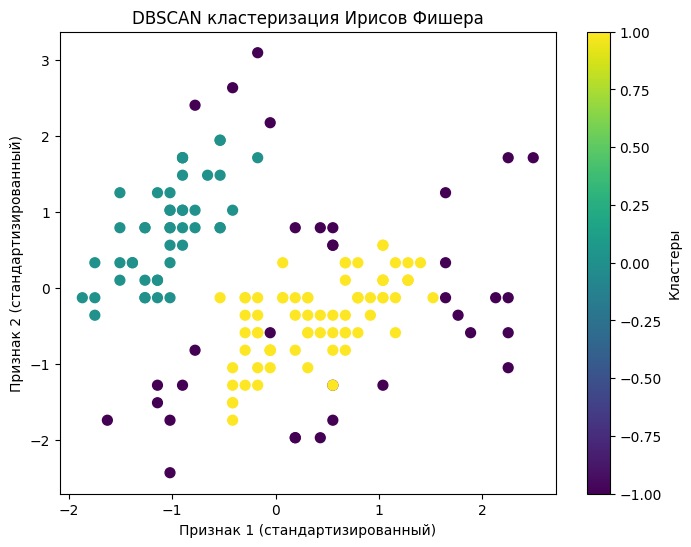

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)

labels = dbscan.fit_predict(X_scaled)

print("Метки кластеров:")
print(labels)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN кластеризация Ирисов Фишера")
plt.xlabel("Признак 1 (стандартизированный)")
plt.ylabel("Признак 2 (стандартизированный)")
plt.colorbar(label="Кластеры")
plt.show()

**Задание 4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров**

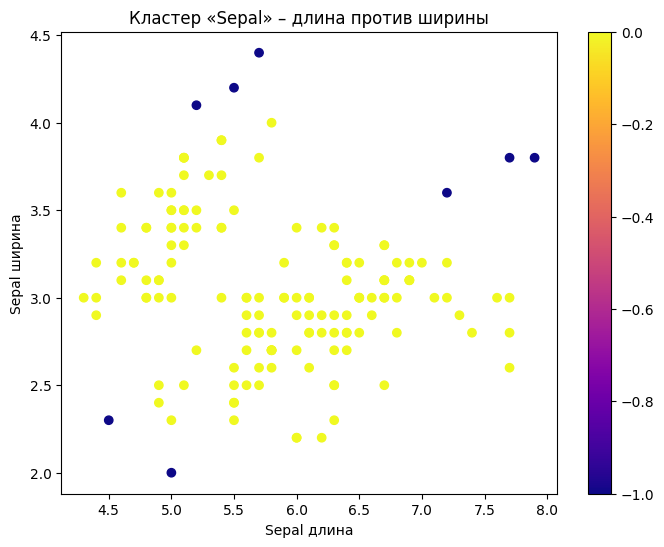

In [15]:
df_iris['cluster'] = labels
plt.figure(figsize=(8, 6))
plt.scatter(
    df_iris["sepal length (cm)"],
    df_iris["sepal width (cm)"],
    c=df_iris["cluster"],
    cmap="plasma"
)
plt.title("Кластер «Sepal» – длина против ширины")
plt.xlabel("Sepal длина")
plt.ylabel("Sepal ширина")
plt.colorbar()
plt.show()

**Задание 5. Сделайте вывод.**

In [16]:
# Выводы:
# 1. **Подготовка данных**: Данные Ирисов Фишера были загружены, нормализованы с помощью MinMaxScaler, а затем стандартизированы с использованием StandardScaler для применения DBSCAN. Это важные шаги для обеспечения корректной работы алгоритмов, чувствительных к масштабу признаков.
# 2. **Кластеризация DBSCAN**: Алгоритм DBSCAN был применен с параметрами `eps=0.5` и `min_samples=5`. DBSCAN успешно идентифицировал плотные области в данных, но также отнес значительную часть точек к категории шума (метка -1). Это характерно для DBSCAN, который позволяет обнаруживать выбросы и кластеры произвольной формы.
# 3. **Визуализация результатов**: Диаграмма рассеяния для 'sepal length (cm)' и 'sepal width (cm)' с цветовым кодированием кластеров показала, что DBSCAN сформировал несколько групп. Видно, что большая часть данных была объединена в один большой кластер (кластер 0), также был выделен небольшой кластер (кластер 1) и множество точек, определенных как шум. Это указывает на то, что при текущих параметрах DBSCAN может быть не идеальным для полного разделения всех известных видов ирисов только по этим двум признакам.

# **Заключение**: DBSCAN эффективно выявил плотные области в данных, но его чувствительность к параметрам `eps` и `min_samples` привела к тому, что значительное количество точек было классифицировано как шум. Для более точного отражения структуры данных ириса, возможно, потребуется дальнейшая оптимизация этих параметров или анализ других комбинаций признаков.